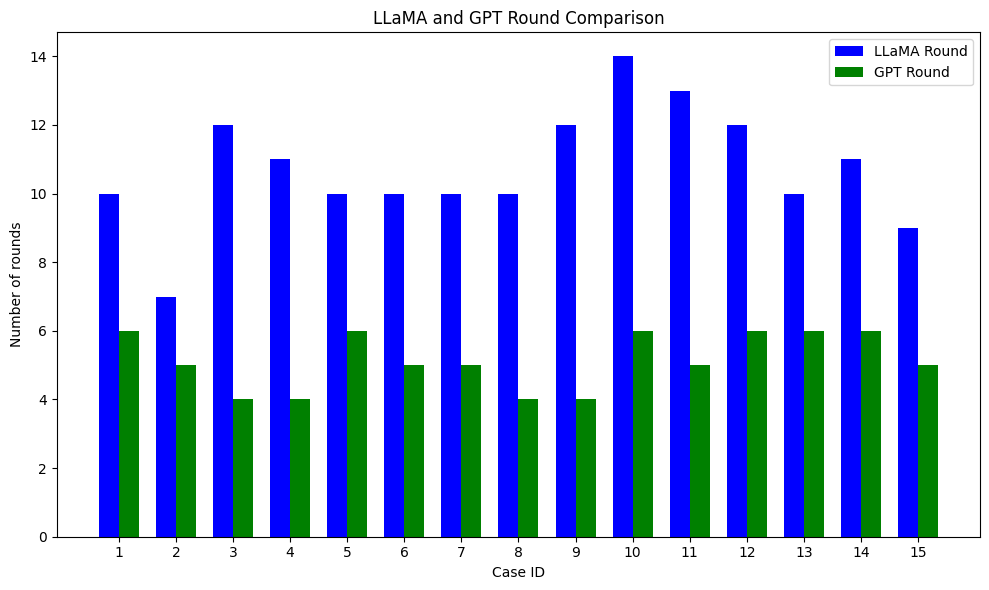

In [2]:
# Re-import necessary libraries and reinitialize the data to create the bar chart
import numpy as np
import matplotlib.pyplot as plt

# Data
llama_round = np.array([10, 7, 12, 11, 10, 10, 10, 10, 12, 14, 13, 12, 10, 11, 9])
gpt_round = np.array([6, 5, 4, 4, 6, 5, 5, 4, 4, 6, 5, 6, 6, 6, 5])

# Number of input examples
input_examples = np.arange(1, len(llama_round) + 1)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart for LLaMA and GPT
bar_width = 0.35
index = np.arange(len(input_examples))

bar1 = ax.bar(index, llama_round, bar_width, label='LLaMA Round', color='b')
bar2 = ax.bar(index + bar_width, gpt_round, bar_width, label='GPT Round', color='g')

# Adding labels and titles
ax.set_xlabel('Case ID')
ax.set_ylabel('Number of rounds')
ax.set_title('LLaMA and GPT Round Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(input_examples)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

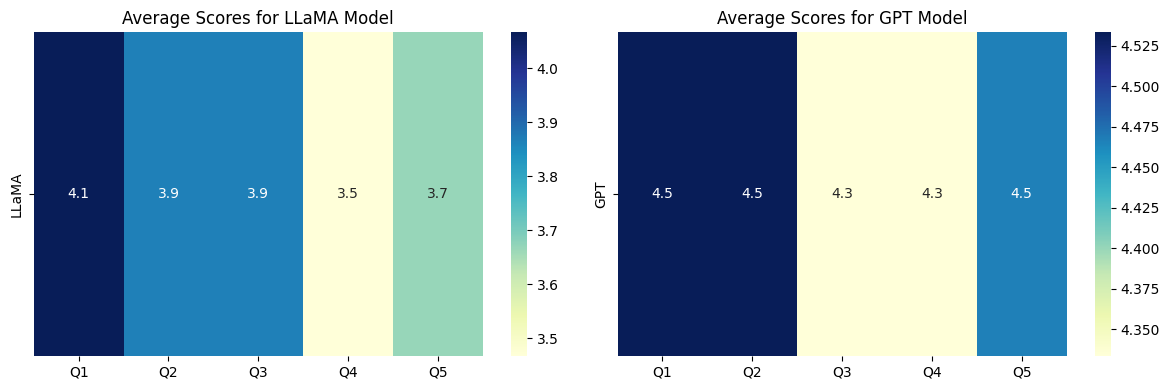

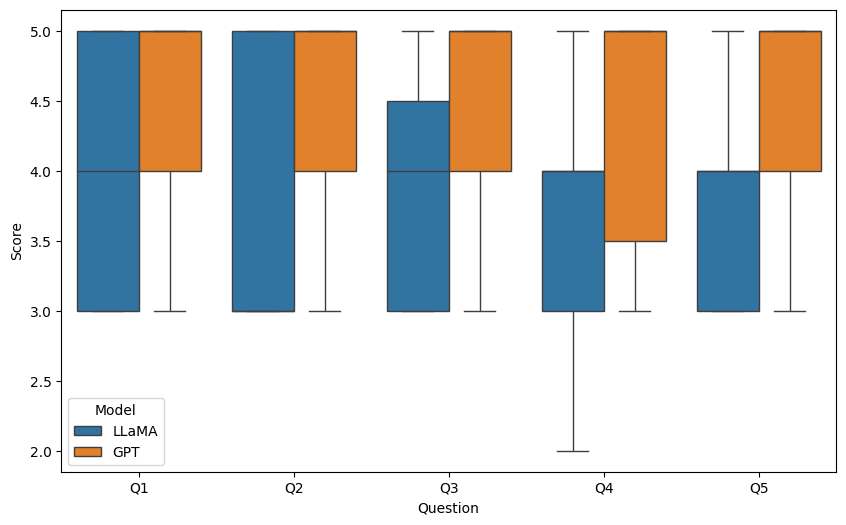

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

# Data for the two models
llama_data = [
    [3,3,4,3,3],
    [4,3,4,4,4],
    [5,5,5,4,5],
    [5,5,5,4,4],
    [5,5,4,4,4],
    [5,4,4,4,4],
    [5,5,5,4,4],
    [5,5,5,5,5],
    [4,3,4,3,3],
    [3,3,3,2,3],
    [3,3,3,3,3],
    [3,3,3,2,3],
    [4,5,3,4,4],
    [3,3,3,3,3],
    [4,3,3,3,3],
]

gpt_data = [
    [3,4,4,3,3],
    [5,5,4,4,5],
    [5,5,5,5,5],
    [5,5,5,5,5],
    [5,5,5,5,5],
    [5,4,4,4,4],
    [5,5,5,5,5],
    [5,5,5,5,5],
    [4,5,4,5,5],
    [4,4,3,3,4],
    [5,5,5,5,5],
    [5,5,5,5,5],
    [5,5,5,5,5],
    [3,3,3,3,3],
    [4,3,3,3,3],
]

# Convert data into pandas DataFrames
columns = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
llama_df = pd.DataFrame(llama_data, columns=columns)
gpt_df = pd.DataFrame(gpt_data, columns=columns)

# Perform statistical analysis
# Paired t-tests for each question
ttest_results = {}
for col in columns:
    t_stat, p_val = ttest_rel(llama_df[col], gpt_df[col])
    ttest_results[col] = {'t-statistic': t_stat, 'p-value': p_val}

ttest_results_df = pd.DataFrame(ttest_results).T

# Generate mean data for heatmaps
llama_means = llama_df.mean().values.reshape(1, -1)
gpt_means = gpt_df.mean().values.reshape(1, -1)

# Plotting heatmaps
plt.figure(figsize=(12, 4))

# Heatmap for LLaMA model
plt.subplot(1, 2, 1)
sns.heatmap(llama_means, annot=True, cmap='YlGnBu', cbar=True, xticklabels=columns, yticklabels=['LLaMA'])
plt.title('Average Scores for LLaMA Model')

# Heatmap for GPT model
plt.subplot(1, 2, 2)
sns.heatmap(gpt_means, annot=True, cmap='YlGnBu', cbar=True, xticklabels=columns, yticklabels=['GPT'])
plt.title('Average Scores for GPT Model')

plt.tight_layout()
plt.show()

# Boxplot comparison
plt.figure(figsize=(10, 6))
combined_data = pd.concat([llama_df.melt(var_name='Question', value_name='Score').assign(Model='LLaMA'), 
                           gpt_df.melt(var_name='Question', value_name='Score').assign(Model='GPT')])

sns.boxplot(data=combined_data, x='Question', y='Score', hue='Model')
#plt.title('Comparison of Scores by Question for LLaMA and GPT Models')
plt.show()
